<a href="https://colab.research.google.com/github/snehasri25/Data-Visualization/blob/master/Nightingale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
require("tidyverse")
require("dplyr")
require("reshape2")
library("HistData")
require("ggplot2")

In [16]:
#install.packages("HistData")
data(Nightingale)
#head(Nightingale)
data <- Nightingale
data

Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
<date>,<ord>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0
1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6
1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5
1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6
1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9
1854-09-01,Sep,1854,30290,788,81,70,312.2,32.1,27.7
1854-10-01,Oct,1854,30643,503,132,128,197.0,51.7,50.1
1854-11-01,Nov,1854,29736,844,287,106,340.6,115.8,42.8
1854-12-01,Dec,1854,32779,1725,114,131,631.5,41.7,48.0


In [17]:
data1<- data[,c(1,8:10)]
names(data1)[2] <- "Diseases"
names(data1)[3] <- "Wounds"
names(data1)[4] <- "Other"
data1

Date,Diseases,Wounds,Other
<date>,<dbl>,<dbl>,<dbl>
1854-04-01,1.4,0.0,7.0
1854-05-01,6.2,0.0,4.6
1854-06-01,4.7,0.0,2.5
1854-07-01,150.0,0.0,9.6
1854-08-01,328.5,0.4,11.9
1854-09-01,312.2,32.1,27.7
1854-10-01,197.0,51.7,50.1
1854-11-01,340.6,115.8,42.8
1854-12-01,631.5,41.7,48.0


In [37]:
data1_reshape <- melt(data1, "Date")
names(data1_reshape) <- c("Date", "Causes", "Death_Rate")
head(data1_reshape)

,Date,Causes,Death_Rate
,<date>,<fct>,<dbl>
1,1854-04-01,Diseases,1.4
2,1854-05-01,Diseases,6.2
3,1854-06-01,Diseases,4.7
4,1854-07-01,Diseases,150.0
5,1854-08-01,Diseases,328.5
6,1854-09-01,Diseases,312.2


In [21]:
data1_reshape$Reign <- ordered( rep(c(rep('Before', 12), rep('After', 12)), 3), 
                          levels=c('Before', 'After'))
data2 <- data1_reshape
head(data2)

,Date,Causes,Death_Rate,Reign
,<date>,<fct>,<dbl>,<ord>
1,1854-04-01,Diseases,1.4,Before
2,1854-05-01,Diseases,6.2,Before
3,1854-06-01,Diseases,4.7,Before
4,1854-07-01,Diseases,150.0,Before
5,1854-08-01,Diseases,328.5,Before
6,1854-09-01,Diseases,312.2,Before


In [0]:
# subsets, to facilitate separate plotting
df1 <- subset(data2, Reign=='Before')
df2 <- subset(data2, Reign=='After')

# sort according to Deaths in decreasing order, so counts are not obscured [thx: Monique Graf]
df1 <- df1[order(df1$Death_Rate, decreasing=TRUE),]
df2 <- df2[order(df2$Death_Rate, decreasing=TRUE),]

# merge the two sorted files
#df <- rbind(df1, df2)


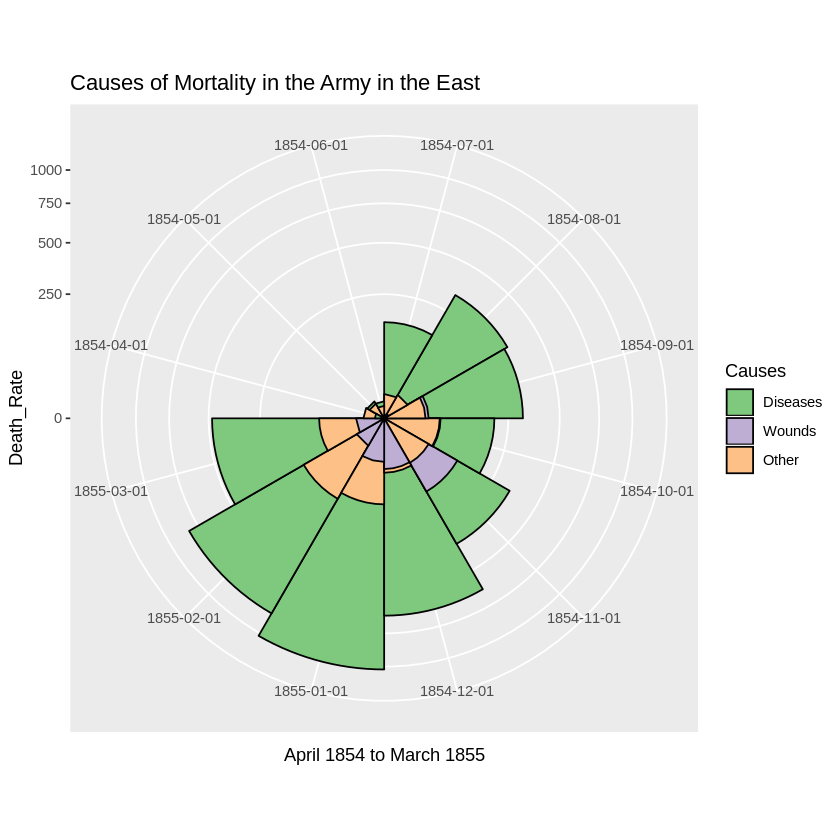

In [66]:
# Before plot
r1 <- ggplot(df1, aes(x = factor(Date), y=Death_Rate, fill = Causes)) +
		# do it as a stacked bar chart first
   geom_bar(width = 1, position="identity", stat="identity", color="black") +
		# set scale so area ~ rate of Deaths	
   scale_y_sqrt() 
		# A coxcomb plot = bar chart + polar coordinates
r1 + coord_polar(start=3*pi/2) + 
  #scale_fill_manual(values = c("#00CED1", "red", "black" )) +
  scale_fill_brewer(palette = "Accent") +
	ggtitle("Causes of Mortality in the Army in the East") + 
	xlab("April 1854 to March 1855")


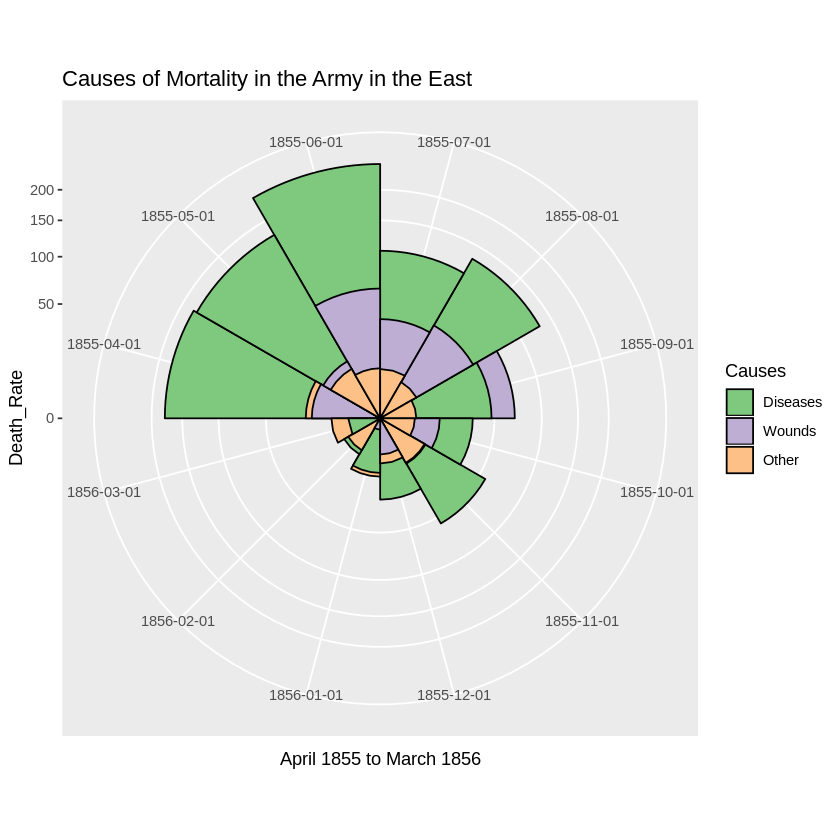

In [62]:
# After plot
r2 <- ggplot(df2, aes(x = factor(Date), y=Death_Rate, fill = Causes)) +
   geom_bar(width = 1, position="identity", stat="identity", color="black") +
   scale_y_sqrt()
r2 + coord_polar(start=3*pi/2) +
  scale_fill_brewer(palette = "Accent") +
	ggtitle("Causes of Mortality in the Army in the East") + 
	xlab("April 1855 to March 1856")